In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Some general plotting settings (optional)
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

In [8]:
from google.colab import files
uploaded = files.upload()


Saving Workplace Diversity, Equity & Inclusion (Responses).xlsx to Workplace Diversity, Equity & Inclusion (Responses) (2).xlsx


In [9]:
df = pd.read_excel("Workplace Diversity, Equity & Inclusion (Responses).xlsx")
df.head()


,Timestamp,Age Group,Gender Identity,Racial or ethnic background,Disability status,Length of time at the organization,Employment level,My team includes employees from diverse demographic backgrounds.,Leadership positions are held by individuals from diverse demographic backgrounds.,Job openings and promotions are communicated equally to all employees.,...,My manager provides equal access to information and resources.,My manager seeks input from employees before implementing team-level changes.,I know the formal process for reporting bias or discrimination.,The organization provides clear information on how reported cases are handled.,Employees who report bias are protected from retaliation.,The organization communicates DEI objectives through internal channels.,DEI training or resources are available to all employees.,"DEI initiatives are integrated into regular business operations (e.g., hiring, performance reviews).",Employees are informed about progress toward DEI goals.,I understand how DEI contributes to the organization’s performance objectives.
0,2025-11-25 14:23:25.142,Under 25,Woman,Asian,I do not identify as a person with a disability,Less than 1 year,Individual contributor,4.0,4,3,...,4,4,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0
1,2025-11-25 14:59:41.975,25 - 34,Man,Asian,I do not identify as a person with a disability,More than 5 years,Executive,3.0,3,3,...,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2025-11-25 17:44:21.434,25 - 34,Woman,Prefer not to say,I do not identify as a person with a disability,Less than 1 year,Individual contributor,2.0,3,5,...,3,3,3.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
3,2025-11-25 23:55:26.230,Under 25,Woman,White,I do not identify as a person with a disability,Less than 1 year,Individual contributor,3.0,5,5,...,5,5,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
4,2025-11-26 08:57:50.648,35 - 44,Man,Asian,I do not identify as a person with a disability,More than 5 years,Senior manager / director,5.0,4,5,...,5,3,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0


In [13]:
# Representation
rep_cols = [
    "My team includes employees from diverse demographic backgrounds.",
    "Leadership positions are held by individuals from diverse demographic backgrounds."
]

# Equity & Fairness
equity_cols = [
    "Job openings and promotions are communicated equally to all employees.",
    "Employees with similar performance receive equal opportunities for advancement.",
    "My workload expectations are consistent with those of my peers in similar roles.",
    "My manager applies performance criteria consistently across team members.",
]

# Psychological Safety
psych_cols = [
    "I can express work-related opinions without negative consequences.",
    "I can admit mistakes without negative consequences for my performance evaluation.",
    "Disagreements in my team are handled respectfully."
]

# Inclusive Leadership
lead_cols = [
    "My manager provides equal access to information and resources.",
    "My manager seeks input from employees before implementing team-level changes. "
]

# Bias Reporting
report_cols = [
    "I know the formal process for reporting bias or discrimination.",
    "The organization provides clear information on how reported cases are handled.",
    "Employees who report bias are protected from retaliation."
]

# DEI Visibility & Integration
vis_cols = [
    "The organization communicates DEI objectives through internal channels.",
    "DEI training or resources are available to all employees.",
    "DEI initiatives are integrated into regular business operations (e.g., hiring, performance reviews).",
    "Employees are informed about progress toward DEI goals.",
    "I understand how DEI contributes to the organization’s performance objectives."
]


In [14]:
dims = {
    "Representation": df[rep_cols].mean().mean(),
    "Equity": df[equity_cols].mean().mean(),
    "Psychological safety": df[psych_cols].mean().mean(),
    "Leadership": df[lead_cols].mean().mean(),
    "Reporting": df[report_cols].mean().mean(),
    "DEI visibility": df[vis_cols].mean().mean()
}

pd.Series(dims).round(2)


,0
Representation,2.93
Equity,3.29
Psychological safety,3.20
Leadership,3.48
Reporting,3.40
DEI visibility,3.23


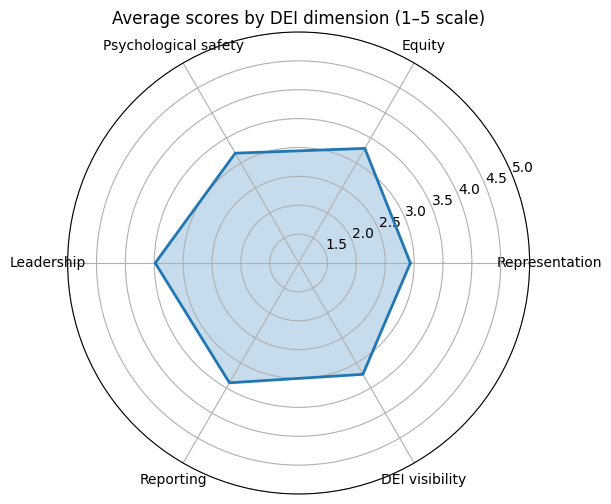

In [15]:
labels = list(dims.keys())
values = list(dims.values())

# close the circle
values += values[:1]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(1, 5)
ax.set_title("Average scores by DEI dimension (1–5 scale)")

plt.show()


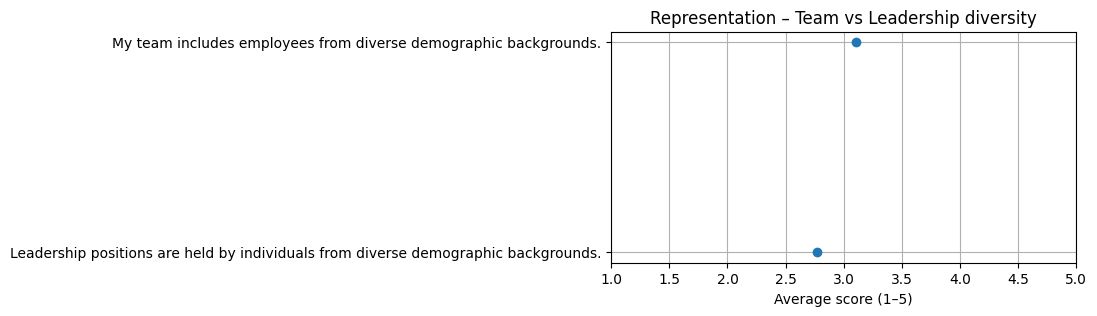

In [16]:
rep_means = df[rep_cols].mean()

y_pos = np.arange(len(rep_means))

plt.figure(figsize=(6,3))
plt.plot(rep_means.values, y_pos, "o")
plt.yticks(y_pos, rep_means.index)
plt.xlim(1, 5)
plt.xlabel("Average score (1–5)")
plt.title("Representation – Team vs Leadership diversity")
plt.gca().invert_yaxis()  # so first item appears at top

plt.show()


/tmp/ipython-input-2611345901.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


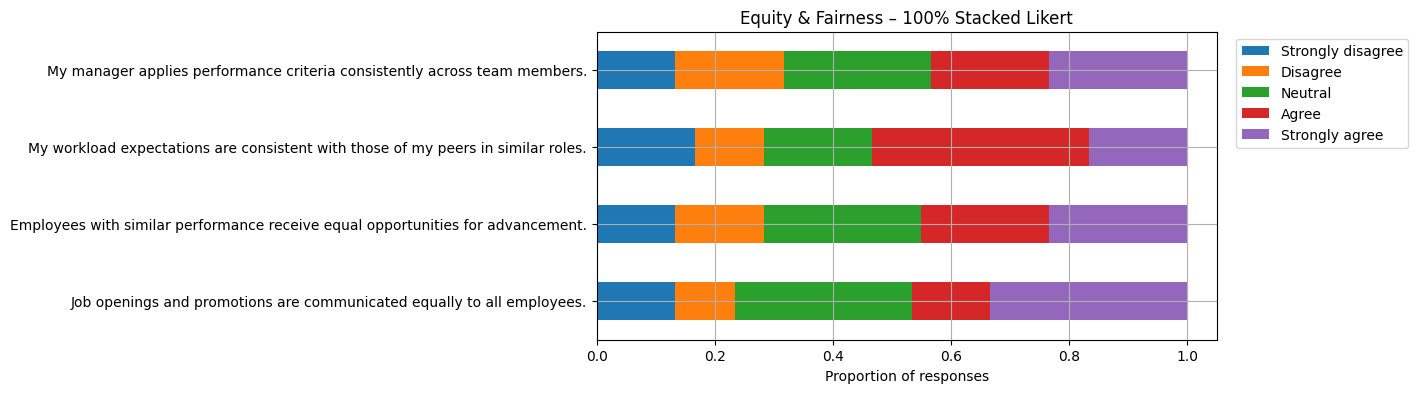

In [17]:
# Map numeric Likert to text labels
likert_map = {
    1: "Strongly disagree",
    2: "Disagree",
    3: "Neutral",
    4: "Agree",
    5: "Strongly agree"
}

equity_df = df[equity_cols].copy()
for col in equity_df.columns:
    equity_df[col] = equity_df[col].map(likert_map)

# Proportions per response level
counts = equity_df.apply(lambda col: col.value_counts(normalize=True)).fillna(0).T
# Ensure consistent order of categories
counts = counts[["Strongly disagree","Disagree","Neutral","Agree","Strongly agree"]]

counts.plot(kind="barh", stacked=True, figsize=(8,4))
plt.xlabel("Proportion of responses")
plt.title("Equity & Fairness – 100% Stacked Likert")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


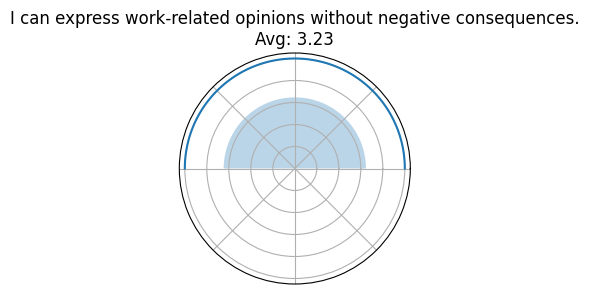

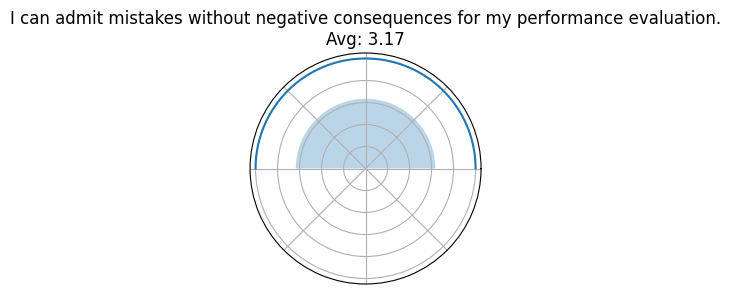

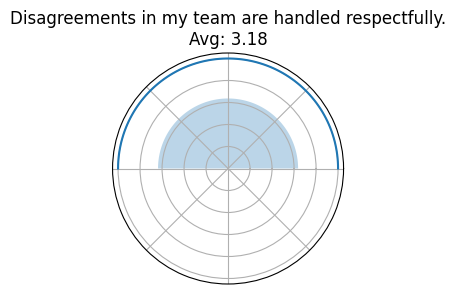

In [18]:
psych_means = df[psych_cols].mean()

def gauge(value, label):
    fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(3,3))
    theta = np.linspace(0, np.pi, 100)
    r = np.ones_like(theta)
    ax.plot(theta, r)
    ax.fill_between(theta, 0, r * (value/5), alpha=0.3)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(label + f"\nAvg: {value:.2f}")
    plt.show()

for question, val in psych_means.items():
    gauge(val, question)

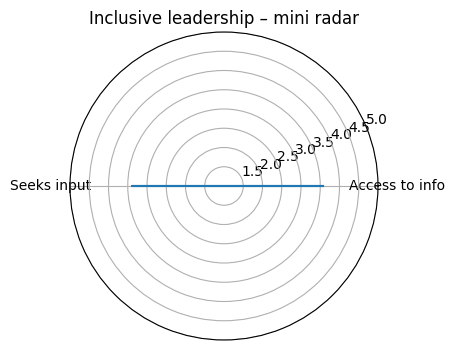

In [19]:
lead_means = df[lead_cols].mean()

labels_lead = ["Access to info", "Seeks input"]
values_lead = list(lead_means.values)
values_lead += values_lead[:1]
angles_lead = np.linspace(0, 2*np.pi, len(labels_lead), endpoint=False).tolist()
angles_lead += angles_lead[:1]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles_lead, values_lead)
ax.fill(angles_lead, values_lead, alpha=0.25)
ax.set_xticks(angles_lead[:-1])
ax.set_xticklabels(labels_lead)
ax.set_ylim(1, 5)
ax.set_title("Inclusive leadership – mini radar")

plt.show()


/tmp/ipython-input-1707303599.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


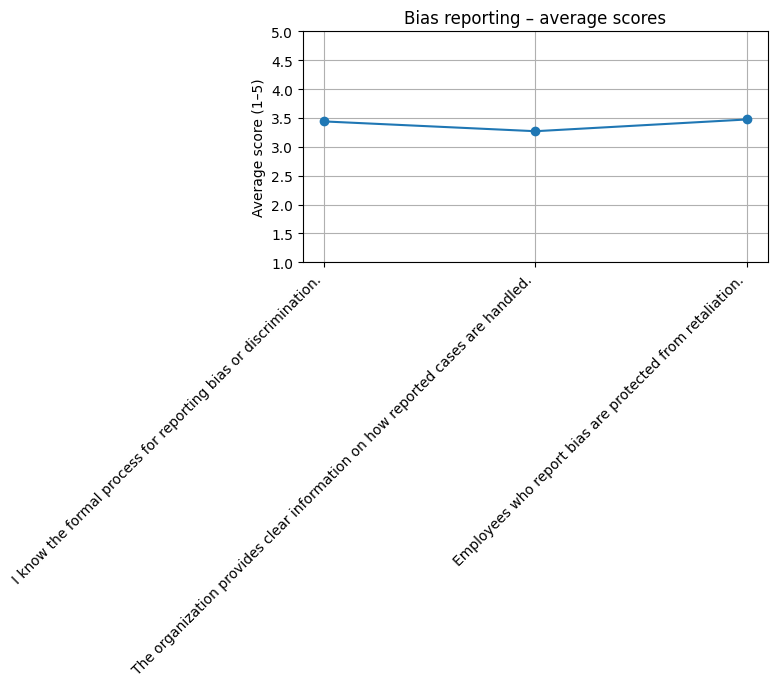

In [20]:
report_means = df[report_cols].mean()

plt.figure(figsize=(6,3))
x_pos = np.arange(len(report_means))
plt.plot(x_pos, report_means.values, "o-")
plt.xticks(x_pos, report_means.index, rotation=45, ha="right")
plt.ylim(1,5)
plt.ylabel("Average score (1–5)")
plt.title("Bias reporting – average scores")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1144737052.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


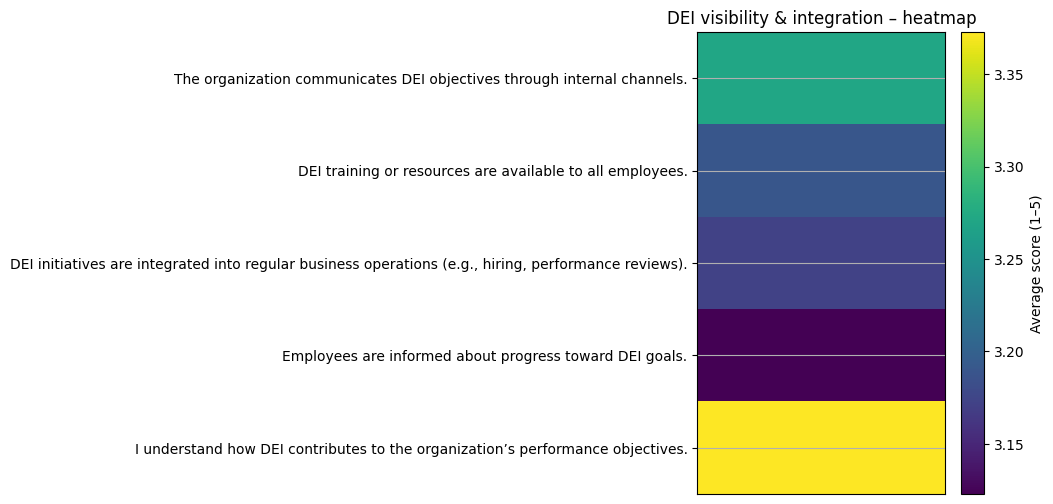

In [21]:
vis_means = df[vis_cols].mean()

data = vis_means.values.reshape(-1, 1)

plt.figure(figsize=(4,6))
plt.imshow(data, aspect="auto")
plt.colorbar(label="Average score (1–5)")
plt.yticks(range(len(vis_cols)), vis_cols)
plt.xticks([])
plt.title("DEI visibility & integration – heatmap")
plt.tight_layout()
plt.show()
